# [프로젝트1] 탐색적 자료 분석 및 데이터 전처리


---

# 프로젝트 목표
---
- Photo 공정 공정지표 F 데이터에 대한 구조 확인과 탐색적 자료 분석 과정을 배웁니다.
- 머신러닝 모델을 학습 하기 위해 데이터 전처리 과정을 수행합니다.

# 프로젝트 목차
---

1. **데이터 읽기:** 데이터 분석을 위해 필요한 라이브러리와 Photo 공정 공정지표 F 데이터 불러오기

2. **탐색적 자료 분석:** 데이터 구조 확인과 통계량 및 상관관계 시각화

3. **데이터 전처리:** 머신러닝 모델에 필요한 입력값 형식으로 데이터 처리

# 프로젝트 개요
---

Photo 공정 공정지표 F 데이터의 구조를 확인하고 데이터 내 변수의 특징을 직관적으로 이해할 수 있도록 다양한 시각화 방법을 적용합니다. 마지막으로 머신러닝 모델 학습을 위해 필요한 데이터 전처리 과정을 수행합니다.


# 1. 데이터 읽기
---


## 1.1 라이브러리 불러오기
---


In [1]:
import os  # 경로 지정
import string  # A-T 까지 이니셜을 생성
import warnings  # 경고 사용 문구를 무시

import ipywidgets as widgets  # interactive 시각화
import matplotlib.pyplot as plt  # 시각화
import missingno as msno  # 결측치 시각화
import pandas as pd  # dataframe
import seaborn as sns  # 시각화
from ipywidgets import interact, interactive  # interactive 시각화
from sklearn.model_selection import train_test_split  # 데이터 분리

# 경고 사용 문구 무시
warnings.filterwarnings(action="ignore")

# seaborn figure layout 설정 값
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

# dataframe을 출력할 때 보이는 행과 열 최대값 크기 지정
pd.set_option("display.max_columns", 1000)
pd.set_option("display.max_rows", 1000)

## 1.2 데이터 불러오기
---

pandas를 사용하여 데이터를 읽고 dataframe 형태로 저장해 봅시다.

실습에 제공된 데이터 파일명은 `Pnt_data_course.csv` 입니다.

In [2]:
datadir = '/mnt/elice/dataset'

dataname = 'Pnt_data_course.csv' # 데이터 파일명
datapath = os.path.join(datadir, dataname) # 데이터 저장 경로와 파일명을 통해 데이터 경로를 구성

df = pd.read_csv(datapath) # csv 파일이기 때문에 pandas의 read_csv로 데이터를 불러옴
print(f'load data from {datapath}')

load data from /mnt/elice/dataset/Pnt_data_course.csv


# 2. 탐색적 자료 분석
---

<p align="center">
    <img width="500" src="./assets/data_description.png">
</p>

데이터를 불러온 후 먼저 데이터의 크기를 살펴봅니다.

In [3]:
data_size, column_size = df.shape # 데이터 크기 확인 
# df.shape : 행/열 수를 튜플 형태로 반환해줌

print('data size: ',data_size)
print('column size: ',column_size)

data size:  44891
column size:  88


pandas dataframe의 head method를 사용해서 상위 다섯 개 행을 볼 수 있습니다.

In [4]:
df.head()

,No.,LOT_ID,WF_ID,X_AXIS,Y_AXIS,GRADE_CD,G_A,G_B,G_C,G_D,G_E,G_F,G_G,G_H,G_I,G_J,G_K,G_L,G_M,G_N,G_O,G_P,G_Q,G_R,G_S,G_T,Neighbor_A,Neighbor_B,Neighbor_C,Neighbor_D,Neighbor_E,Neighbor_F,Neighbor_G,Neighbor_H,Neighbor_I,Neighbor_J,Neighbor_K,Neighbor_L,Neighbor_M,Neighbor_N,Neighbor_O,Neighbor_P,Neighbor_Q,Neighbor_R,Neighbor_S,Neighbor_T,Weight_Base_A,Weight_Base_B,Weight_Base_C,Weight_Base_D,Weight_Base_E,Weight_Base_F,Weight_Base_G,Weight_Base_H,Weight_Base_I,Weight_Base_J,Weight_Base_K,Weight_Base_L,Weight_Base_M,Weight_Base_N,Weight_Base_O,Weight_Base_P,Weight_Base_Q,Weight_Base_R,Weight_Base_S,Weight_Base_T,Weight_Bound_A,Weight_Bound_B,Weight_Bound_C,Weight_Bound_D,Weight_Bound_E,Weight_Bound_F,Weight_Bound_G,Weight_Bound_H,Weight_Bound_I,Weight_Bound_J,Weight_Bound_K,Weight_Bound_L,Weight_Bound_M,Weight_Bound_N,Weight_Bound_O,Weight_Bound_P,Weight_Bound_Q,Weight_Bound_R,Weight_Bound_S,Weight_Bound_T,Train/Test,PKT_Y
0,64644,ABC1258,7,49,30,SQ,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,Train,0.0
1,38592,ABC1258,4,58,18,SQ,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,2,20,12,20,20,0,0,0,1,0,1,0,0,1.0,1,0,0,1,0,0,3,1,4,6,8,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.202381,6.190476,8.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.386905,14.547619,31.071429,0.0,0.0,Train,0.0
2,57430,ABC1258,13,63,32,SQ,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,12,11,0,0,0,0,0,0,0,0,0.0,0,0,1,0,0,0,0,0,0,6,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,Train,0.0
3,24993,ABC1236,4,47,14,SQ,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,9,12,0,0,1,2,0,1,0,1,1.0,1,1,0,1,0,3,0,1,1,6,6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,Train,1.0
4,63408,ABC1258,23,54,34,SQ,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,Train,0.0


불러온 데이터의 변수 별 유형(type)을 보기 위해서는 pandas dataframe의 info method를 사용합니다.  
info method를 사용하면 아래와 같은 내용을 살펴볼 수 있습니다.
- 데이터 크기
- 변수 이름 (`Column`)
- 변수 별 결측치(null) 수 (`Count`)
- 데이터 유형 (`Dtype`)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44891 entries, 0 to 44890
Data columns (total 88 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No.             44891 non-null  int64  
 1   LOT_ID          44891 non-null  object 
 2   WF_ID           44891 non-null  int64  
 3   X_AXIS          44891 non-null  int64  
 4   Y_AXIS          44891 non-null  int64  
 5   GRADE_CD        44891 non-null  object 
 6   G_A             44891 non-null  int64  
 7   G_B             44891 non-null  int64  
 8   G_C             44891 non-null  int64  
 9   G_D             44891 non-null  int64  
 10  G_E             44891 non-null  int64  
 11  G_F             44891 non-null  int64  
 12  G_G             44891 non-null  int64  
 13  G_H             44891 non-null  float64
 14  G_I             44891 non-null  int64  
 15  G_J             44891 non-null  int64  
 16  G_K             44891 non-null  int64  
 17  G_L             44891 non-null 

## 2.1 결측치 확인

결측치를 더 구체적으로 살펴보기 위해서는 pandas dataframe의 `isna` method를 사용할 수 있습니다.  
`isna` method는 dataframe 내 각 원소가 null 인지 아닌지 True or False로 표현합니다.

`sum` method를 통해 축(axis)을 0으로 하면 열을 기준으로 행에 대한 합을 의미합니다.  
이때 변수 마다 0값이 나오면 결측치(NaN)가 없다는 것을 의미합니다.

In [6]:
df.isna().sum(axis=0)

No.               0
LOT_ID            0
WF_ID             0
X_AXIS            0
Y_AXIS            0
GRADE_CD          0
G_A               0
G_B               0
G_C               0
G_D               0
G_E               0
G_F               0
G_G               0
G_H               0
G_I               0
G_J               0
G_K               0
G_L               0
G_M               0
G_N               0
G_O               0
G_P               0
G_Q               0
G_R               0
G_S               0
G_T               0
Neighbor_A        0
Neighbor_B        0
Neighbor_C        0
Neighbor_D        0
Neighbor_E        0
Neighbor_F        0
Neighbor_G        0
Neighbor_H        0
Neighbor_I        0
Neighbor_J        0
Neighbor_K        0
Neighbor_L        0
Neighbor_M        0
Neighbor_N        0
Neighbor_O        0
Neighbor_P        0
Neighbor_Q        0
Neighbor_R        0
Neighbor_S        0
Neighbor_T        0
Weight_Base_A     0
Weight_Base_B     0
Weight_Base_C     0
Weight_Base_D     0


시각적으로 결측치 여부를 확인하기 위해서는 앞서 불러온 missingno을 활용하여 barplot을 통해 시각화할 수 있습니다.  
변수 마다 barplot에 여백이 생긴다면 결측치가 존재한다는 것을 의미합니다.

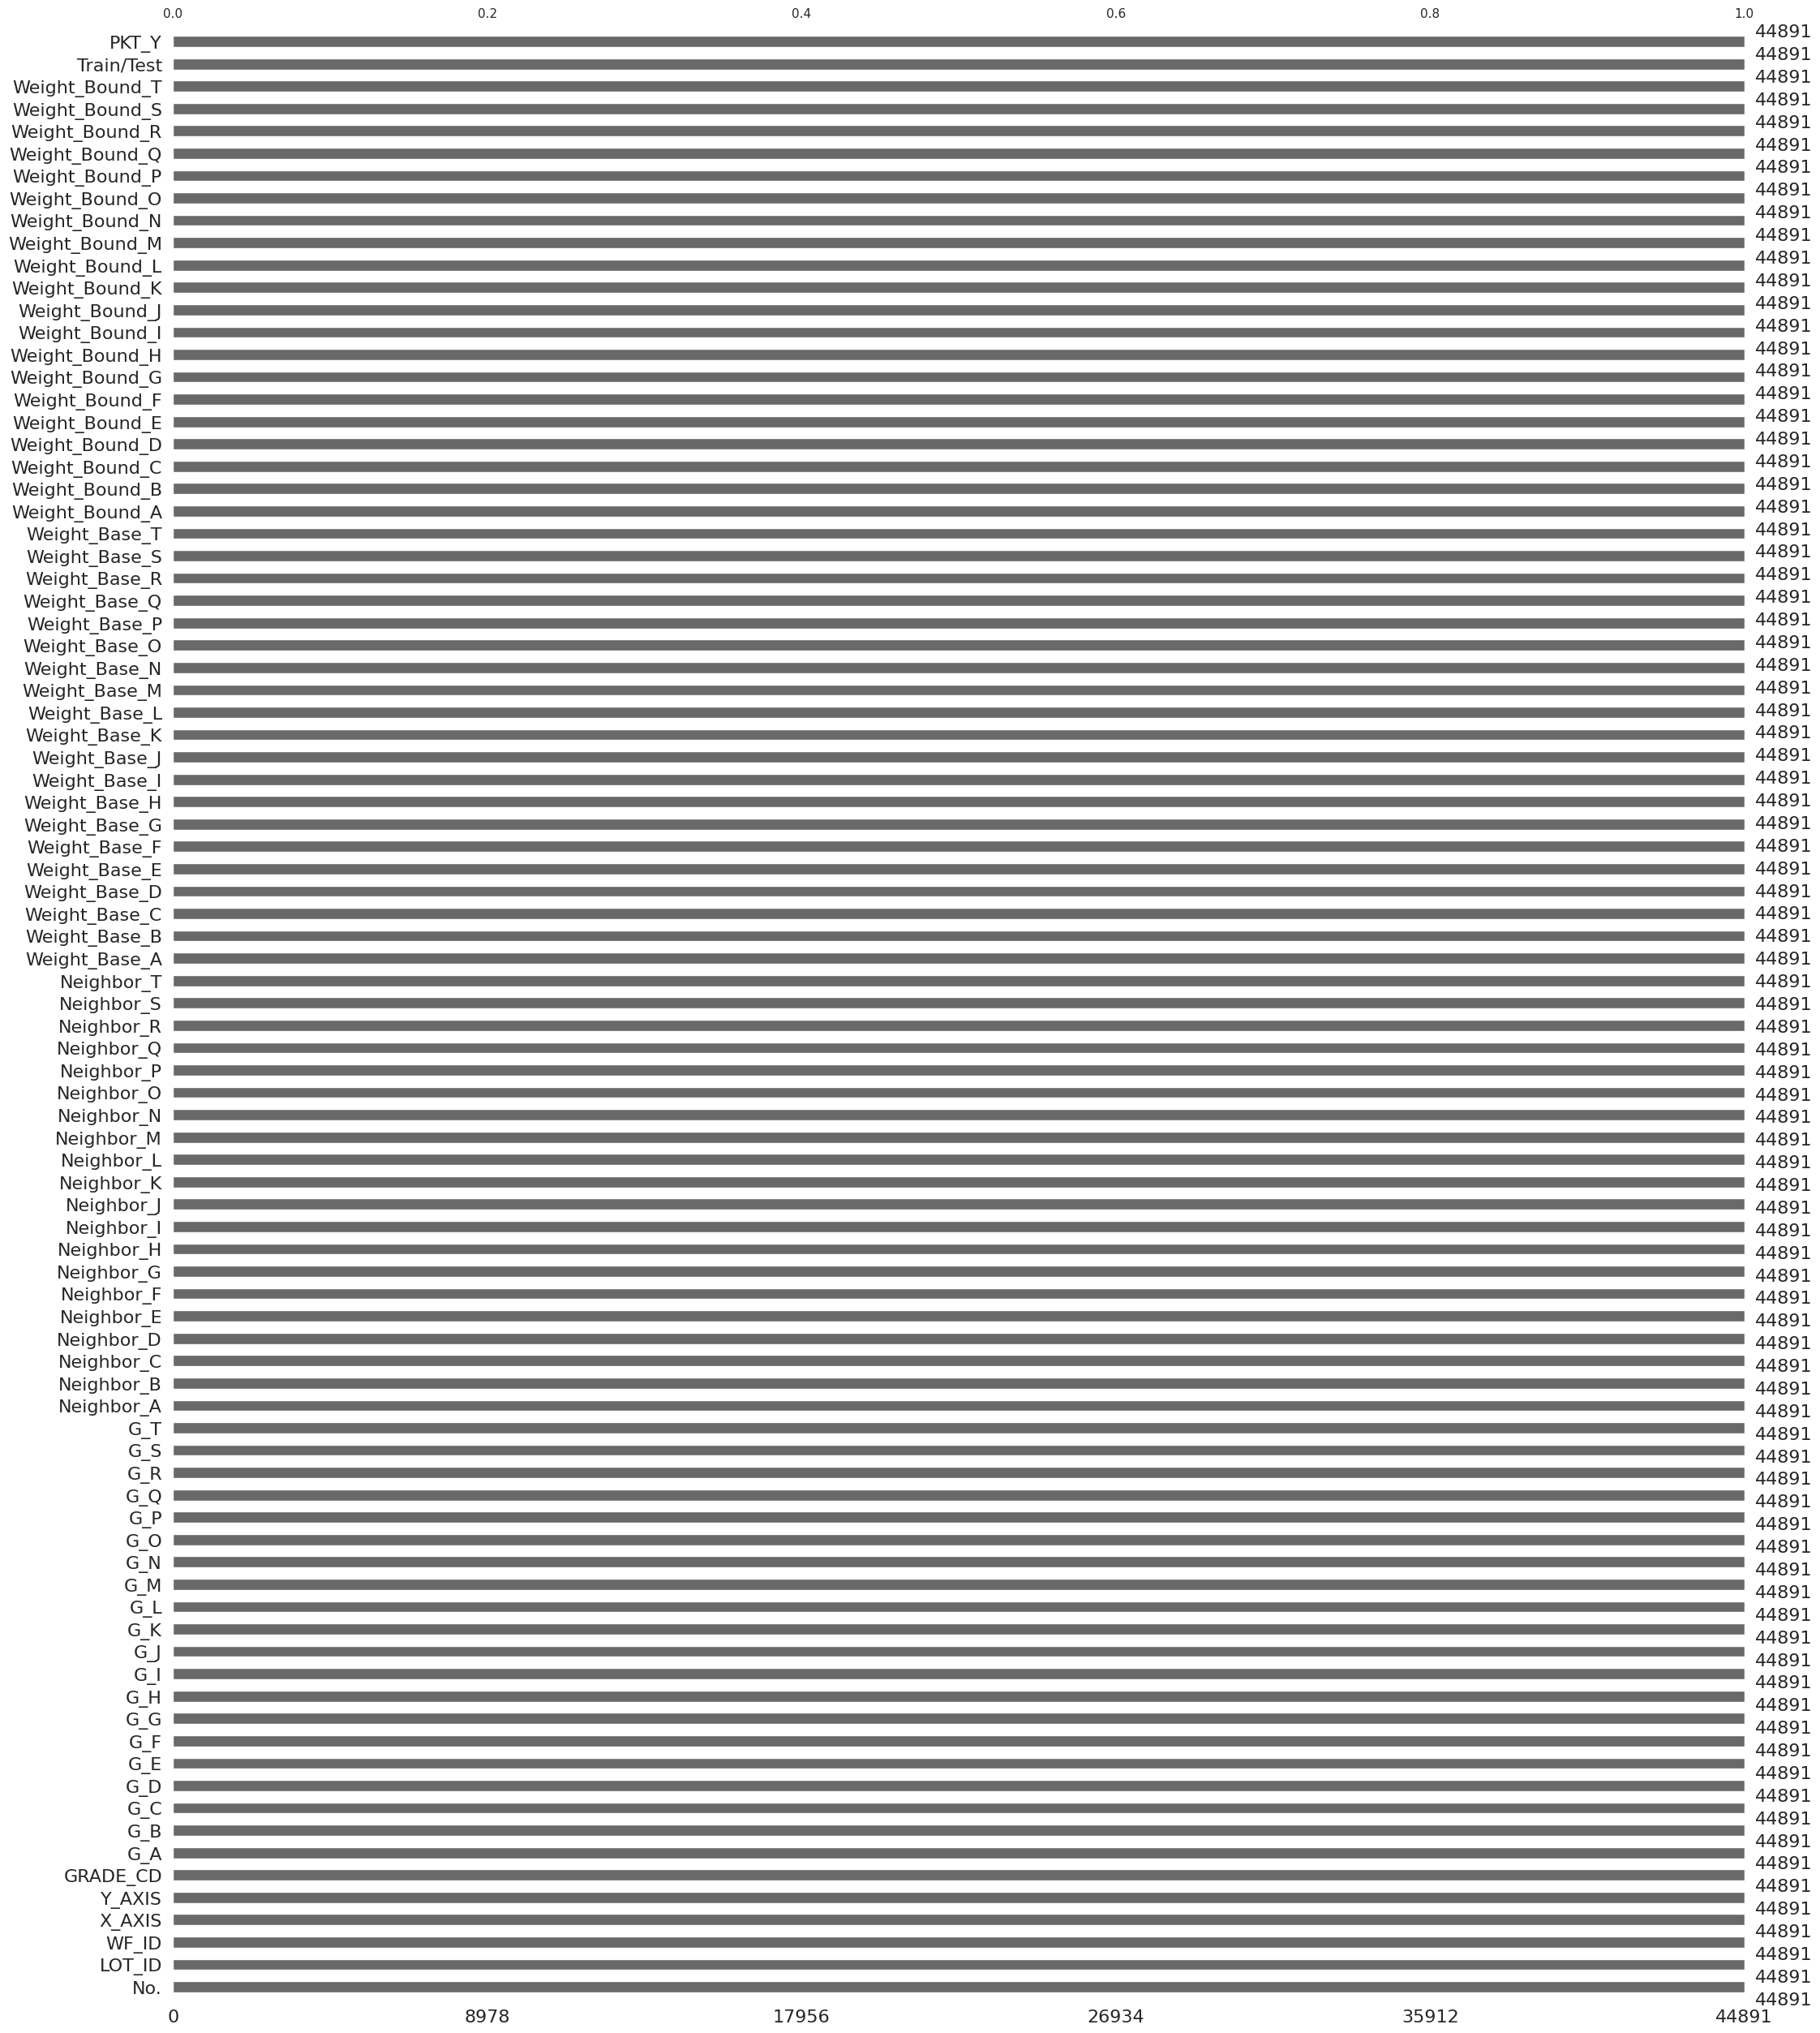

In [7]:
msno.bar(df)
plt.show()

## 2.2 통계량 확인

가장 쉽게 변수별 통계량을 확인할 수 있는 방법은 dataframe의 `describe` method를 사용하는 것 입니다.  
이때 describe의 인자로 `include='all'`을 적용하게 되면 문자열(string)으로 되어있는 변수에 대한 통계량도 함께 제공합니다.

`describe(include='all')`의 결과
1. 연속형 변수: 평균(mean), 표준편차(std), 최소값(min), 3사분위수(25%), 중간값(50%), 1사분위수(75%), 최대값(max)
2. 범주형 변수: 범주 수(unique), 최빈값(top), 최빈값빈도(freq)

In [8]:
# WF_ID와 PKT_Y의 경우 범주형으로 통계량을 확인하기 위해 
# dataframe의 astype method를 사용해서 string으로 변환합니다.
df['WF_ID'] = df['WF_ID'].astype(str)
df['PKT_Y'] = df['PKT_Y'].astype(str)# 통계량 확인
df.describe(include='all')

,No.,LOT_ID,WF_ID,X_AXIS,Y_AXIS,GRADE_CD,G_A,G_B,G_C,G_D,G_E,G_F,G_G,G_H,G_I,G_J,G_K,G_L,G_M,G_N,G_O,G_P,G_Q,G_R,G_S,G_T,Neighbor_A,Neighbor_B,Neighbor_C,Neighbor_D,Neighbor_E,Neighbor_F,Neighbor_G,Neighbor_H,Neighbor_I,Neighbor_J,Neighbor_K,Neighbor_L,Neighbor_M,Neighbor_N,Neighbor_O,Neighbor_P,Neighbor_Q,Neighbor_R,Neighbor_S,Neighbor_T,Weight_Base_A,Weight_Base_B,Weight_Base_C,Weight_Base_D,Weight_Base_E,Weight_Base_F,Weight_Base_G,Weight_Base_H,Weight_Base_I,Weight_Base_J,Weight_Base_K,Weight_Base_L,Weight_Base_M,Weight_Base_N,Weight_Base_O,Weight_Base_P,Weight_Base_Q,Weight_Base_R,Weight_Base_S,Weight_Base_T,Weight_Bound_A,Weight_Bound_B,Weight_Bound_C,Weight_Bound_D,Weight_Bound_E,Weight_Bound_F,Weight_Bound_G,Weight_Bound_H,Weight_Bound_I,Weight_Bound_J,Weight_Bound_K,Weight_Bound_L,Weight_Bound_M,Weight_Bound_N,Weight_Bound_O,Weight_Bound_P,Weight_Bound_Q,Weight_Bound_R,Weight_Bound_S,Weight_Bound_T,Train/Test,PKT_Y
count,44891.000000,44891,44891,44891.000000,44891.000000,44891,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.000000,44891.00000,44891,44891
unique,NaN,3,25,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2
top,NaN,ABC1258,23,NaN,NaN,SQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,0.0
freq,NaN,23559,2124,NaN,NaN,33038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44891,38180
mean,44936.042904,NaN,NaN,39.787641,27.478737,NaN,1.416832,1.405582,1.591589,1.709986,2.338776,1.388252,1.727384,1.657894,1.618142,1.651222,1.736339,1.742844,1.836025,1.560023,2.402397,1.545410,1.347575,9.694616,7.713595,2.237843,0.728698,0.734290,0.898176,1.041567,1.134481,0.717093,0.902742,0.917634,0.906507,0.869239,0.926511,0.923236,0.973001,0.802923,1.170791,1.169611,1.035219,3.144706,2.991090,1.369116,0.158150,0.182837,0.230816,0.540698,0.452954,0.187658,0.613509,0.299624,0.300646,0.566202,0.678408,0.750714,0.699815,0.813849,0.759841,1.061276,0.931897,3.897933,4.689491,0.403316,0.329093,0.401437,0.555233,1.182021,0.967156,0.393868,1.308229,0.632221,0.613534,1.172641,1.443008,1.570719,1.466368,1.520711,1.365965,2.215396,1.925943,7.524140,8.434699,0.87894,NaN,NaN
std,25855.621870,NaN,NaN,14.249508,8.372044,NaN,6.928853,6.856721,7.036642,6.060513,8.784213,6.

In [9]:
# 앞서 변환한 변수 유형을 다시 원래 유형으로 변환합니다.
df['WF_ID'] = df['WF_ID'].astype(int)
df['PKT_Y'] = df['PKT_Y'].astype(float)

범주형 변수에 대한 빈도값은 막대그래프를 통해 시각화하여 직관적으로 확인할 수 있습니다.  
막대 그래프를 그리기 위해서는 범주별 빈도값을 구해야합니다.  

dataframe에서 막대그래프를 그리기 위한 범주(`LOT_ID`)를 선택하고 `value_count` method를 적용하면 범주형 빈도를 구할 수 있습니다.

In [10]:
df_bar = df['LOT_ID'].value_counts()
df_bar

LOT_ID
ABC1258    23559
ABC1236    11905
ABC1111     9427
Name: count, dtype: int64

막대그래프 그릴 때 변수 이름을 입력하기 위해 `reset_index` method를 사용하여 dataframe 형태로 변환합니다.

In [11]:
df_bar = df_bar.reset_index(name='Frequency')
df_bar

,LOT_ID,Frequency
0,ABC1258,23559
1,ABC1236,11905
2,ABC1111,9427


막대그래프는 seaborn의 `barplot`을 사용하여 그릴 수 있습니다.  
x와 y에는 입력한 데이터(`data`)에서 변수 이름을 문자열로 입력하여 지정합니다.

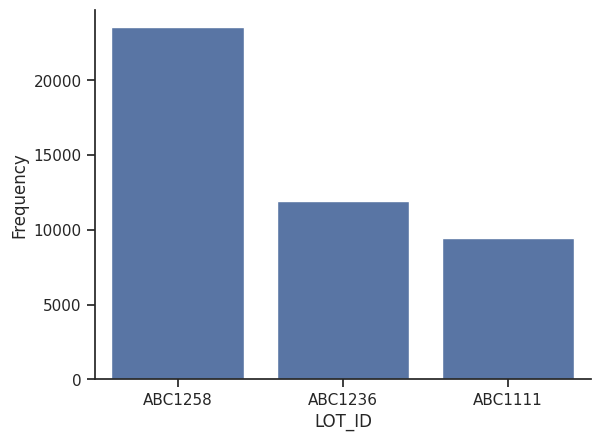

In [12]:
sns.barplot(
    x    = 'LOT_ID',
    y    = 'Frequency',
    data = df_bar
)
plt.xlabel('LOT_ID') # x축 label을 LOT_ID로 수정
plt.show()

범주를 그룹화하여 두 가지 범주(`LOT_ID`, `WF_ID`)를 같이 고려한 막대그래프를 그리기 위해서는 `groupby` method를 사용합니다.

In [13]:
df_bar = df.groupby('LOT_ID')['WF_ID'].value_counts().reset_index(name='Frequency')
df_bar

,LOT_ID,WF_ID,Frequency
0,ABC1111,24,790
1,ABC1111,23,673
2,ABC1111,12,534
3,ABC1111,21,524
4,ABC1111,16,519
5,ABC1111,6,518
6,ABC1111,20,511
7,ABC1111,13,505
8,ABC1111,18,502
9,ABC1111,15,499


Tip. 데이터의 행이 너무 길어서 가로로 보기 어려울때는 `T` method를 통해 dataframe의 행과 열을 바꿀 수 있습니다.

In [14]:
df_bar.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70
LOT_ID,ABC1111,ABC1111,ABC1111,ABC1111,ABC1111,ABC1111,ABC1111,ABC1111,ABC1111,ABC1111,ABC1111,ABC1111,ABC1111,ABC1111,ABC1111,ABC1111,ABC1111,ABC1111,ABC1111,ABC1111,ABC1111,ABC1111,ABC1111,ABC1236,ABC1236,ABC1236,ABC1236,ABC1236,ABC1236,ABC1236,ABC1236,ABC1236,ABC1236,ABC1236,ABC1236,ABC1236,ABC1236,ABC1236,ABC1236,ABC1236,ABC1236,ABC1236,ABC1236,ABC1236,ABC1236,ABC1236,ABC1236,ABC1258,ABC1258,ABC1258,ABC1258,ABC1258,ABC1258,ABC1258,ABC1258,ABC1258,ABC1258,ABC1258,ABC1258,ABC1258,ABC1258,ABC1258,ABC1258,ABC1258,ABC1258,ABC1258,ABC1258,ABC1258,ABC1258,ABC1258,ABC1258
WF_ID,24,23,12,21,16,6,20,13,18,15,4,8,17,22,14,19,9,1,7,11,25,3,10,3,22,19,8,6,16,7,4,20,10,14,23,1,11,2,25,17,21,18,5,15,13,12,9,20,15,21,3,18,7,12,1,5,13,16,19,4,25,6,9,11,10,14,23,2,22,17,24
Frequency,790,673,534,524,519,518,511,505,502,499,498,492,479,479,467,463,448,437,23,20,19,18,9,587,538,523,521,517,515,514,508,508,507,499,499,498,496,488,486,474,473,472,469,466,465,451,431,1072,1040,1008,1005,1004,1002,1000,996,992,992,991,979,976,976,971,969,968,967,954,952,950,950,946,899


두 가지 이상의 범주를 하나의 그래프로 쉽게 표현하기 위해서는 seaborn의 `catplot을` 사용할 수 있습니다.  
`catplot은` row와 col에 각 범주를 추가하여 행마다 또는 열마다 범주에 따른 막대그래프를 그립니다.

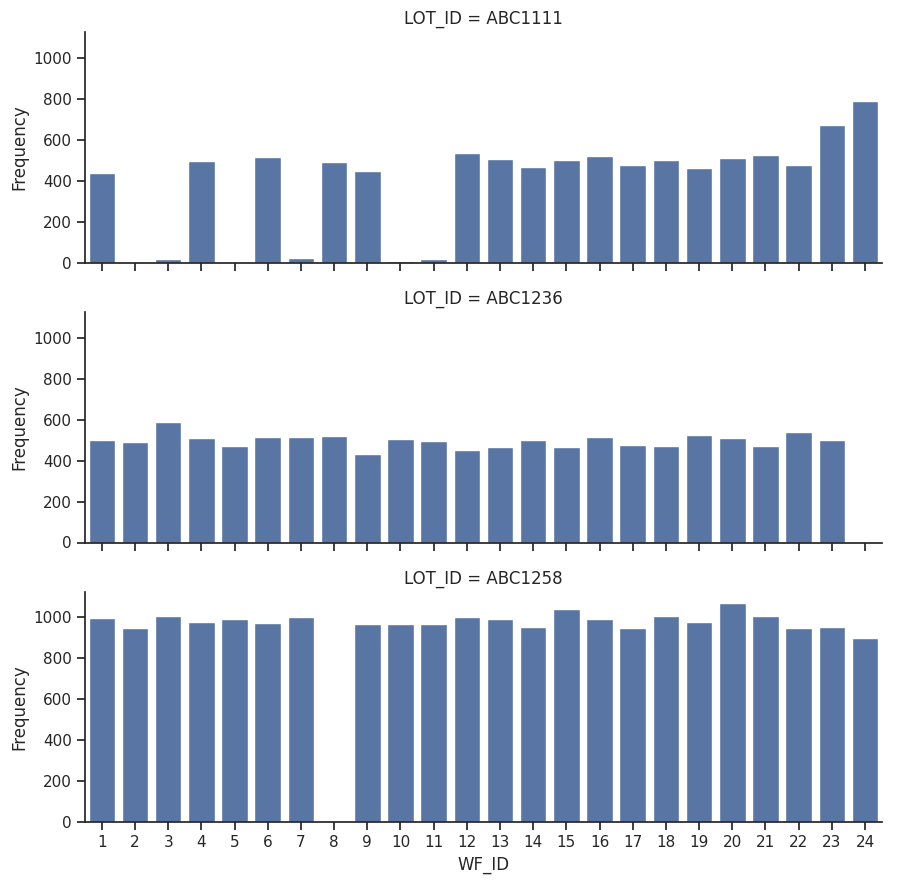

In [15]:
sns.catplot(
    x      = 'WF_ID',
    y      = 'Frequency',
    order  = range(1,25), # x축의 순서를 order에 인자값을 넣음으로써 
    # 원하는대로 정렬할 수 있음
    row    = 'LOT_ID',
    kind   = 'bar', # catplot에서 막대그래프로 표현하기 위해서는 
    # kind에 bar를 지정해야함
    height = 3, # 그래프의 높이를 조절
    aspect = 3, # 그래프의 비율을 조절
    data   = df_bar
)

### [TODO] 세 가지 범주(`LOT_ID`, `WF_ID`, `GRADE_CD`)에 대한 막대그래프를 확인합니다.
- 앞선 코드와 같이 catplot을 통해 확인할 수 있습니다.

In [16]:
# `LOT_ID`, `WF_ID` 두 가지 범주를 groupby로 구성하여 GRADE_CD에 대한 빈도를 구함
'code'

# catplot을 사용하여 열(column)을 기준으로는 `LOT_ID`, 행(row)를 기준으로 GRADE_CD, 
# x축은 `WF_ID`, y축은 Frequency인 막대그래프를 그립니다.
'code'

'code'

## 2.3 상관관계 분석

연속형 변수에 대한 상관관계를 보기 위해서는 dataframe의 `corr` method를 사용하여 쉽게 구할 수 있습니다.

In [17]:
# 연속형 변수인 공정지표 F Data는 Neighbor, Weigh_Base, Weight_Bound 
# 세 가지에 대하여 각각 A부터 T까지 변수를 가지고 있음
letters = string.ascii_letters
letters = letters[letters.find('A'):letters.find('U')]

continuous_features = []
for f in ['G', 'Neighbor', 'Weight_Base', 'Weight_Bound']:
    for l in letters:
        continuous_features.extend([f'{f}_{l}'])
        
print(continuous_features)

['G_A', 'G_B', 'G_C', 'G_D', 'G_E', 'G_F', 'G_G', 'G_H', 'G_I', 'G_J', 'G_K', 'G_L', 'G_M', 'G_N', 'G_O', 'G_P', 'G_Q', 'G_R', 'G_S', 'G_T', 'Neighbor_A', 'Neighbor_B', 'Neighbor_C', 'Neighbor_D', 'Neighbor_E', 'Neighbor_F', 'Neighbor_G', 'Neighbor_H', 'Neighbor_I', 'Neighbor_J', 'Neighbor_K', 'Neighbor_L', 'Neighbor_M', 'Neighbor_N', 'Neighbor_O', 'Neighbor_P', 'Neighbor_Q', 'Neighbor_R', 'Neighbor_S', 'Neighbor_T', 'Weight_Base_A', 'Weight_Base_B', 'Weight_Base_C', 'Weight_Base_D', 'Weight_Base_E', 'Weight_Base_F', 'Weight_Base_G', 'Weight_Base_H', 'Weight_Base_I', 'Weight_Base_J', 'Weight_Base_K', 'Weight_Base_L', 'Weight_Base_M', 'Weight_Base_N', 'Weight_Base_O', 'Weight_Base_P', 'Weight_Base_Q', 'Weight_Base_R', 'Weight_Base_S', 'Weight_Base_T', 'Weight_Bound_A', 'Weight_Bound_B', 'Weight_Bound_C', 'Weight_Bound_D', 'Weight_Bound_E', 'Weight_Bound_F', 'Weight_Bound_G', 'Weight_Bound_H', 'Weight_Bound_I', 'Weight_Bound_J', 'Weight_Bound_K', 'Weight_Bound_L', 'Weight_Bound_M', 'Weig

In [18]:
df_corr = df[continuous_features].corr()
df_corr

,G_A,G_B,G_C,G_D,G_E,G_F,G_G,G_H,G_I,G_J,G_K,G_L,G_M,G_N,G_O,G_P,G_Q,G_R,G_S,G_T,Neighbor_A,Neighbor_B,Neighbor_C,Neighbor_D,Neighbor_E,Neighbor_F,Neighbor_G,Neighbor_H,Neighbor_I,Neighbor_J,Neighbor_K,Neighbor_L,Neighbor_M,Neighbor_N,Neighbor_O,Neighbor_P,Neighbor_Q,Neighbor_R,Neighbor_S,Neighbor_T,Weight_Base_A,Weight_Base_B,Weight_Base_C,Weight_Base_D,Weight_Base_E,Weight_Base_F,Weight_Base_G,Weight_Base_H,Weight_Base_I,Weight_Base_J,Weight_Base_K,Weight_Base_L,Weight_Base_M,Weight_Base_N,Weight_Base_O,Weight_Base_P,Weight_Base_Q,Weight_Base_R,Weight_Base_S,Weight_Base_T,Weight_Bound_A,Weight_Bound_B,Weight_Bound_C,Weight_Bound_D,Weight_Bound_E,Weight_Bound_F,Weight_Bound_G,Weight_Bound_H,Weight_Bound_I,Weight_Bound_J,Weight_Bound_K,Weight_Bound_L,Weight_Bound_M,Weight_Bound_N,Weight_Bound_O,Weight_Bound_P,Weight_Bound_Q,Weight_Bound_R,Weight_Bound_S,Weight_Bound_T
G_A,1.000000,0.952728,0.925011,0.064155,0.760141,0.949872,0.866647,0.921561,0.919343,0.882994,0.879837,0.877436,0.864828,0.892843,0.411819,0.271809,0.254970,0.404257,0.354269,0.148015,0.521843,0.509468,0.472037,0.029860,0.406071,0.510647,0.449439,0.467981,0.471500,0.460026,0.454570,0.455752,0.444242,0.478923,0.321047,0.178192,0.180432,0.216056,0.194190,0.111417,0.159316,0.159553,0.106661,-0.016471,0.075477,0.148977,0.155056,0.060705,0.051548,0.078959,0.091234,0.104194,0.109313,0.088025,-0.005468,-0.010048,-0.009050,0.049657,0.001579,-0.009813,0.156585,0.156307,0.102341,-0.027312,0.104347,0.144017,0.141069,0.090857,0.075889,0.086626,0.077024,0.088752,0.097218,0.084896,-0.011191,-0.016425,-0.014968,0.044715,-0.005115,-0.016342
G_B,0.952728,1.000000,0.928304,0.066319,0.762485,0.946648,0.871906,0.922568,0.922109,0.887292,0.882987,0.880816,0.870966,0.896699,0.412315,0.269765,0.253077,0.406230,0.355505,0.150550,0.509728,0.521283,0.472423,0.027116,0.406109,0.511964,0.450998,0.468901,0.471813,0.463068,0.456061,0.457724,0.446698,0.480250,0.319741,0.177139,0.179614,0.216103,0.193621,0.111831,0.142718,0.181391,0.105243,-0.016251,0.076034,0.147381,0.165695,0.061751,0.054110,0.079157,0.095005,0.108442,0.107519,0.090202,-0.005253,-0.009150,-0.008475,0.052794,0.001731,-0.010195,0.141388,0.176654,0.100524,-0.027126,0.103617,0.143787,0.151729,0.091526,0.078495,0.088686,0.081442,0.092872,0.097166,0.088746,-0.010426,-0.015031,-0.013770,0.050115,-0.004191,-0.017681
G_C,0.925011,0.928304,1.000000,0.083203,0.777741,0.924367,0.864654,0.938318,0.938252,0.886973,0.877428,0.875177,0.865850,0.885135,0.417374,0.283033,0.266887,0.409691,0.355202,0.159873,0.509657,0.508645,0.509379,0.038938,0.426589,0.512814,0.461298,0.488770,0.490089,0.474282,0.467233,0.468943,0.458643,0.489319,0.328168,0.182093,0.185493,0.225299,0.198230,0.125522,0.137956,0.157866,0.168256,-0.008271,0.091560,0.138913,0.152763,0.071125,0.068405,0.082151,0.094054,0.110796,0.110669,0.084455,-0.003519,-0.004307,-0.002531,0.051687,0.001409,-0.005418,0.135918,0.152531,0.159366,-0.018366,0.126407,0.134425,0.139726,0.104871,0.100544,0.090885,0.081673,0.096596,0.099923,0.082944,-0.007284,-0.010327,-0.008013,0.044894,-0.008221,-0.012190
G_D,0.064155,0.066319,0.083203,1.000000,0.074044,0.065733,0.073146,0.081471,0.081376,0.077201,0.072449,0.072465,0.071293,0.071782,0.130174,0.068845,0.066706,0.088043,0.090417,0.496335,0.020372,0.024530,0.023727,0.507250,0.025544,0.022780,0.002712,0.026484,0.025006,0.005931,0.002765,0.008049,0.004689,0.007646,0.099747,0.068873,0.067477,0.044312,0.070665,0.321515,-0.006234,-0.005957,0.023271,0.409422,0.025277,-0.004882,0.002704,0.023556,0.027234,0.022719,0.016112,0.014194,0.016405,0.006691,0.005485,0.051568,0.051618,0.022587,0.013986,0.167758,-0.007893,-0.006725,0.016605,0.466994,0.021555,-0.005261,0.002367,0.021595,0.026854,0.014055,0.009761,0.010206,0.011496,0.001456,0.014680,0.030306,0.030490,0.016562,0.015962,0.192781
G_E,0.760141,0.762485,0.777741,0.074044,1.000000,0.761733,0.719318,0.809417,0.792702,0.729053,0.724925,0.725444,0.722625,0.727404,0.417775,0.266938,0.248887,0.472430,0.397522,0.154015,

앞서 `corr` method를 통해 구한 상관관계는 변수의 수가 많은 수록 한눈에 파악하기 어렵습니다.  
따라서 seaborn의 heatmap을 통해 시각적으로 쉽게 변수간 상관관계의 크기를 색상 정보로 표현할 수 있습니다.

이때 그림 오른쪽에 생성되는 color bar에 색상 정보와 함께 눈금으로 상관관계의 값이 표현되어 있기 때문에 이를 통해 그림을 해석할 수 있습니다.

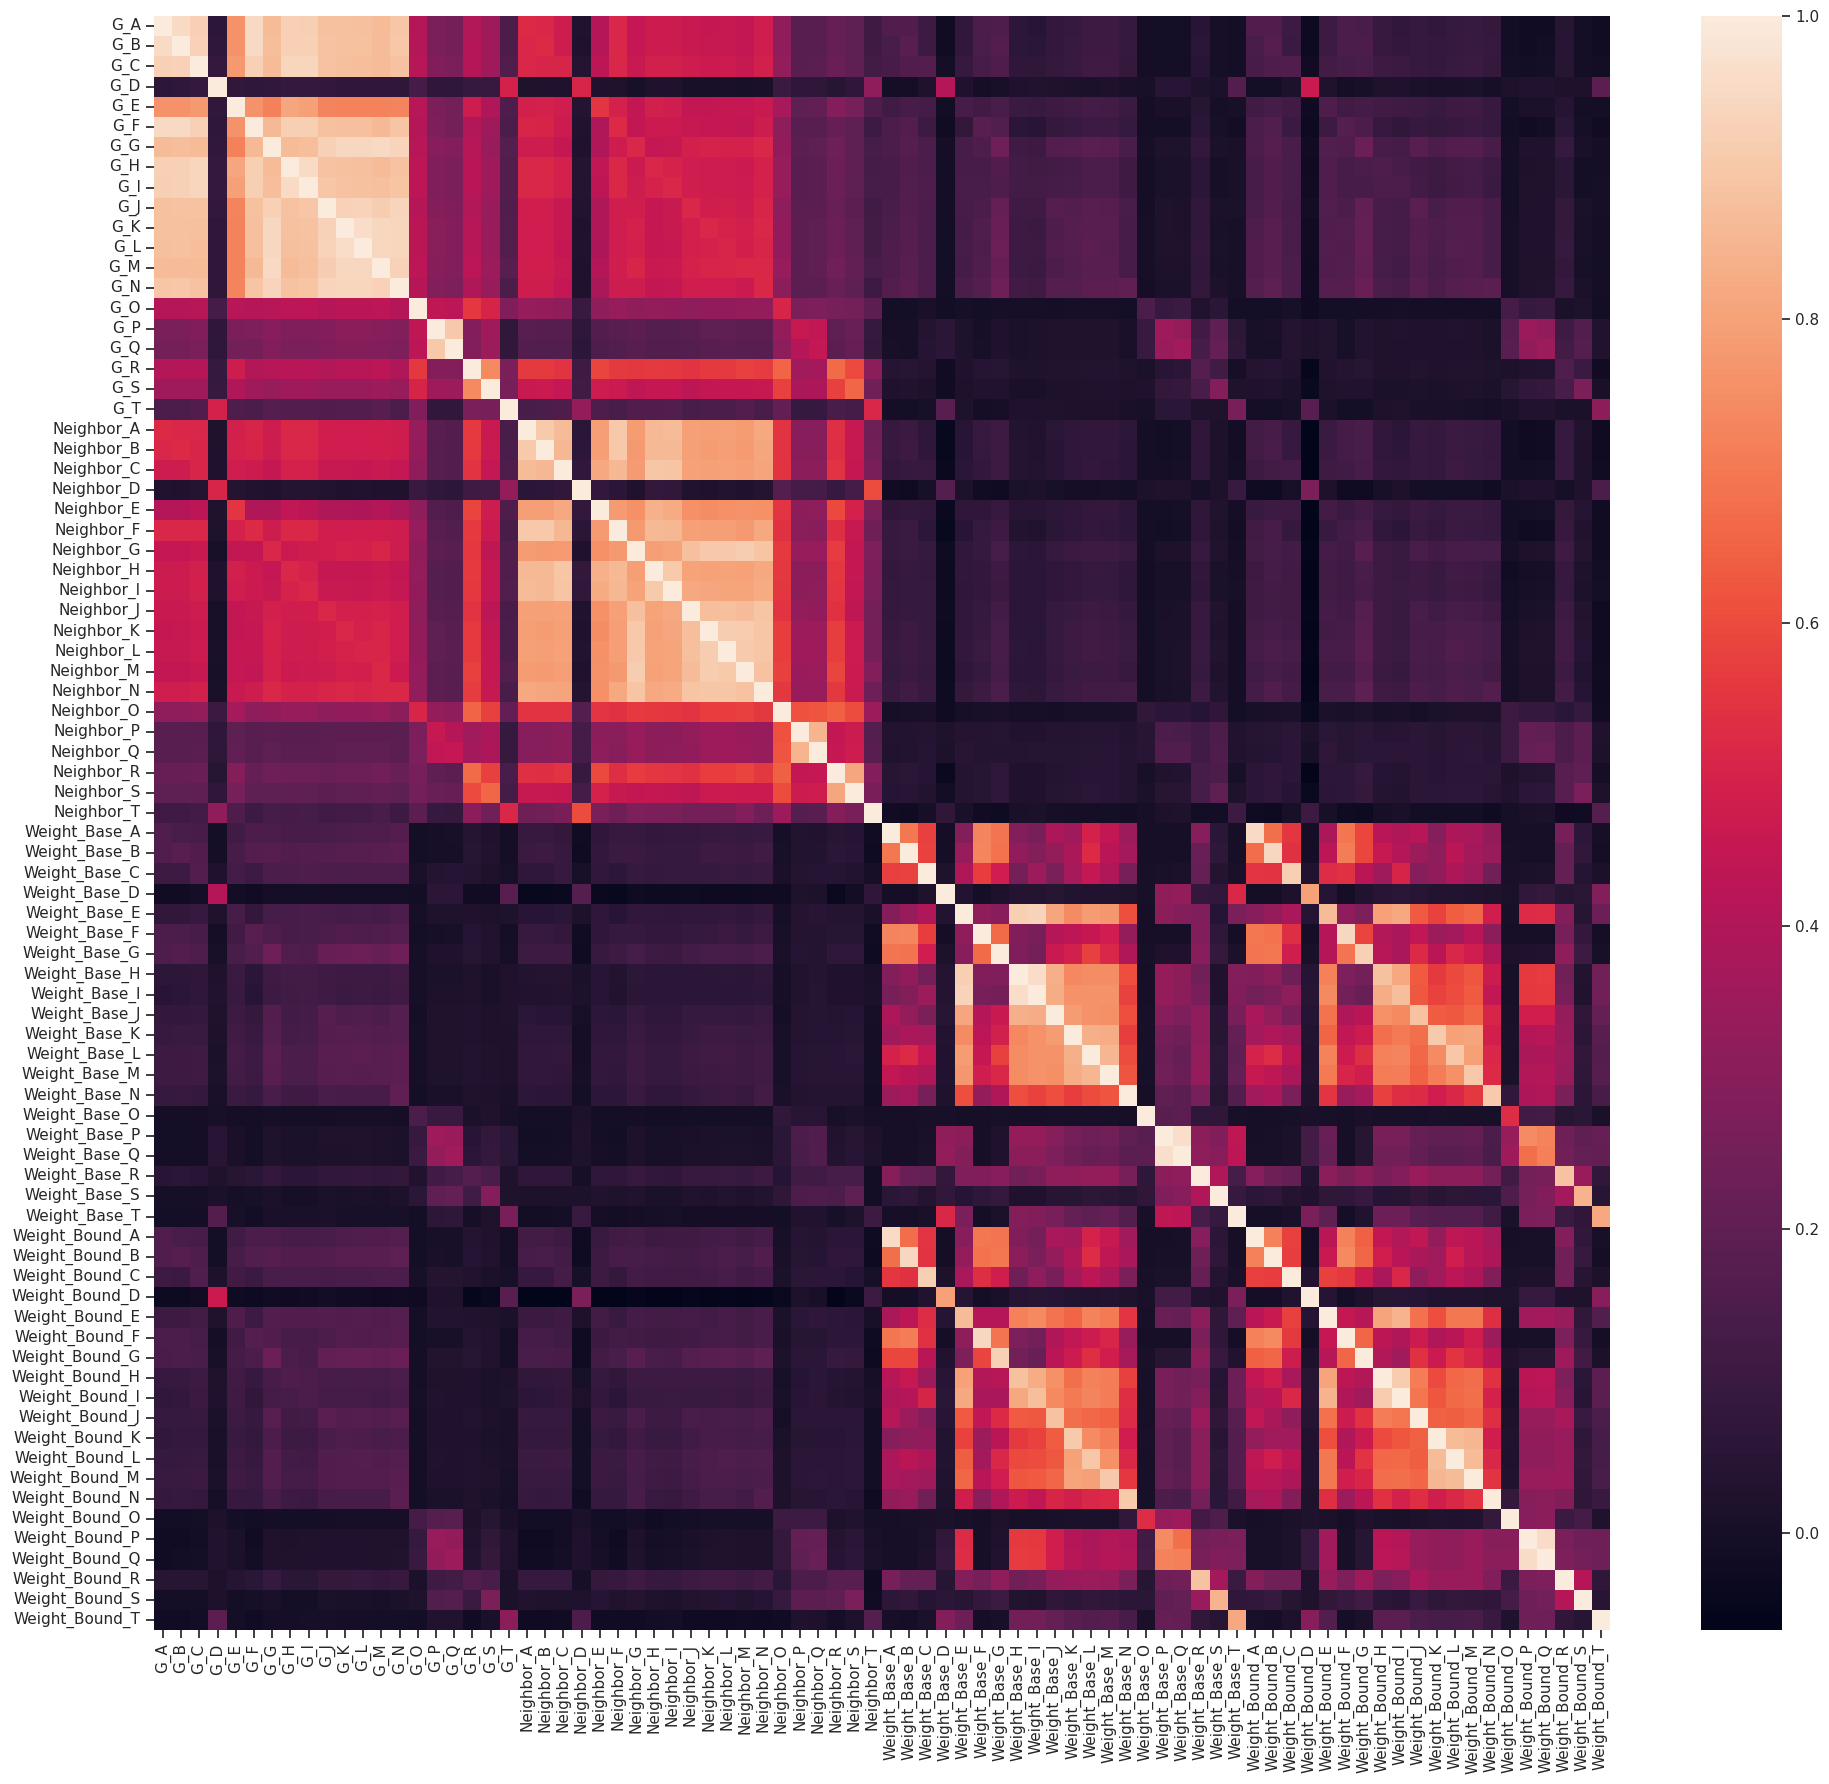

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(20,18))
sns.heatmap(df_corr)
plt.tight_layout()
plt.show()

## 2.4 목표변수(`PKT_Y`)와 다른 변수간 상관관계 분석

목표 변수(`PKT_Y`)의 빈도를 확인하기 위해서 막대그래프를 통해 시각화하여 살펴봅니다.

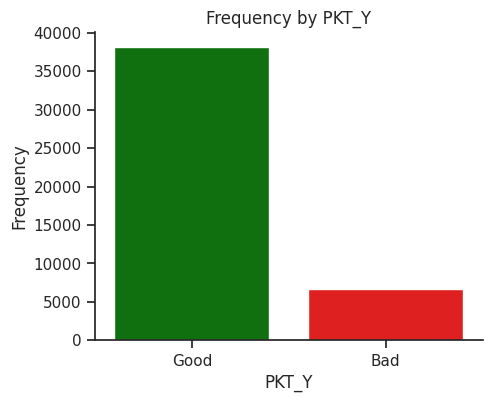

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))
sns.barplot(
    x       = 'PKT_Y',
    y       = 'Frequency',
    palette = ['green','red'], # 색상을 통해 good과 bad를 구분하기 위해서 palette를 사용하여 색을 지정합니다.
    data    = df['PKT_Y'].value_counts().reset_index(name='Frequency'),
    ax      = ax
)
ax.set_title('Frequency by PKT_Y')
ax.set_xticks([0,1], ['Good', 'Bad']) # good은 0 bad는 1로 지정되어 있기 때문에 직관적인 이해를 위해 눈금에 대한 정보를 수정합니다.
plt.show()

`GRADE_CD` 별 목표 변수(`PKT_Y`)의 빈도를 살펴보기 위해 catplot에서 hue를 사용합니다.

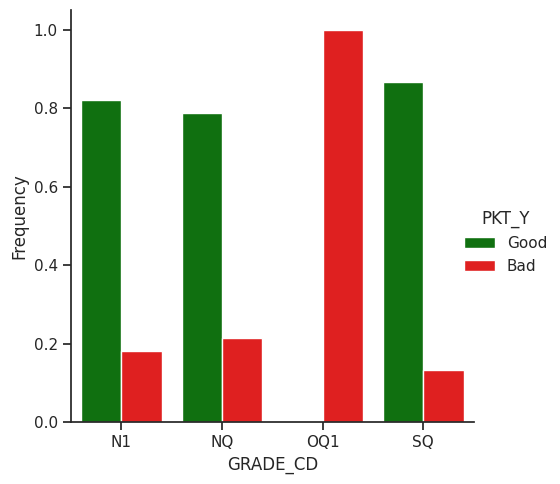

In [21]:
g = sns.catplot(
    x       = 'GRADE_CD',
    y       = 'Frequency',
    hue     = 'PKT_Y', # hue를 PKT_Y로 지정하면 GRADE_CD 범주 별 PKT_Y의 빈도를 그립니다.
    kind    = 'bar',
    palette = ['green', 'red'],
    data    = df.groupby('GRADE_CD')['PKT_Y'].value_counts(normalize=True).reset_index(name='Frequency')
)

# 직관적인 해석을 위해 legend 내 PKT_Y 범주 이름을 Good과 Bad로 변경합니다.
new_labels = ['Good', 'Bad']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

### [TODO] `LOT_ID`와 `WF_ID`에 따른 목표변수(`PKT_Y`)를 막대그래프로 표현합니다.

'code' 작성 후 마지막에 아래 코드를 추가하여 figure를 완성하세요.

```python
axes = g.axes.flatten()
for ax in axes:
    ax.set_xticks([0,1], ['Good','Bad'])
plt.show()
```

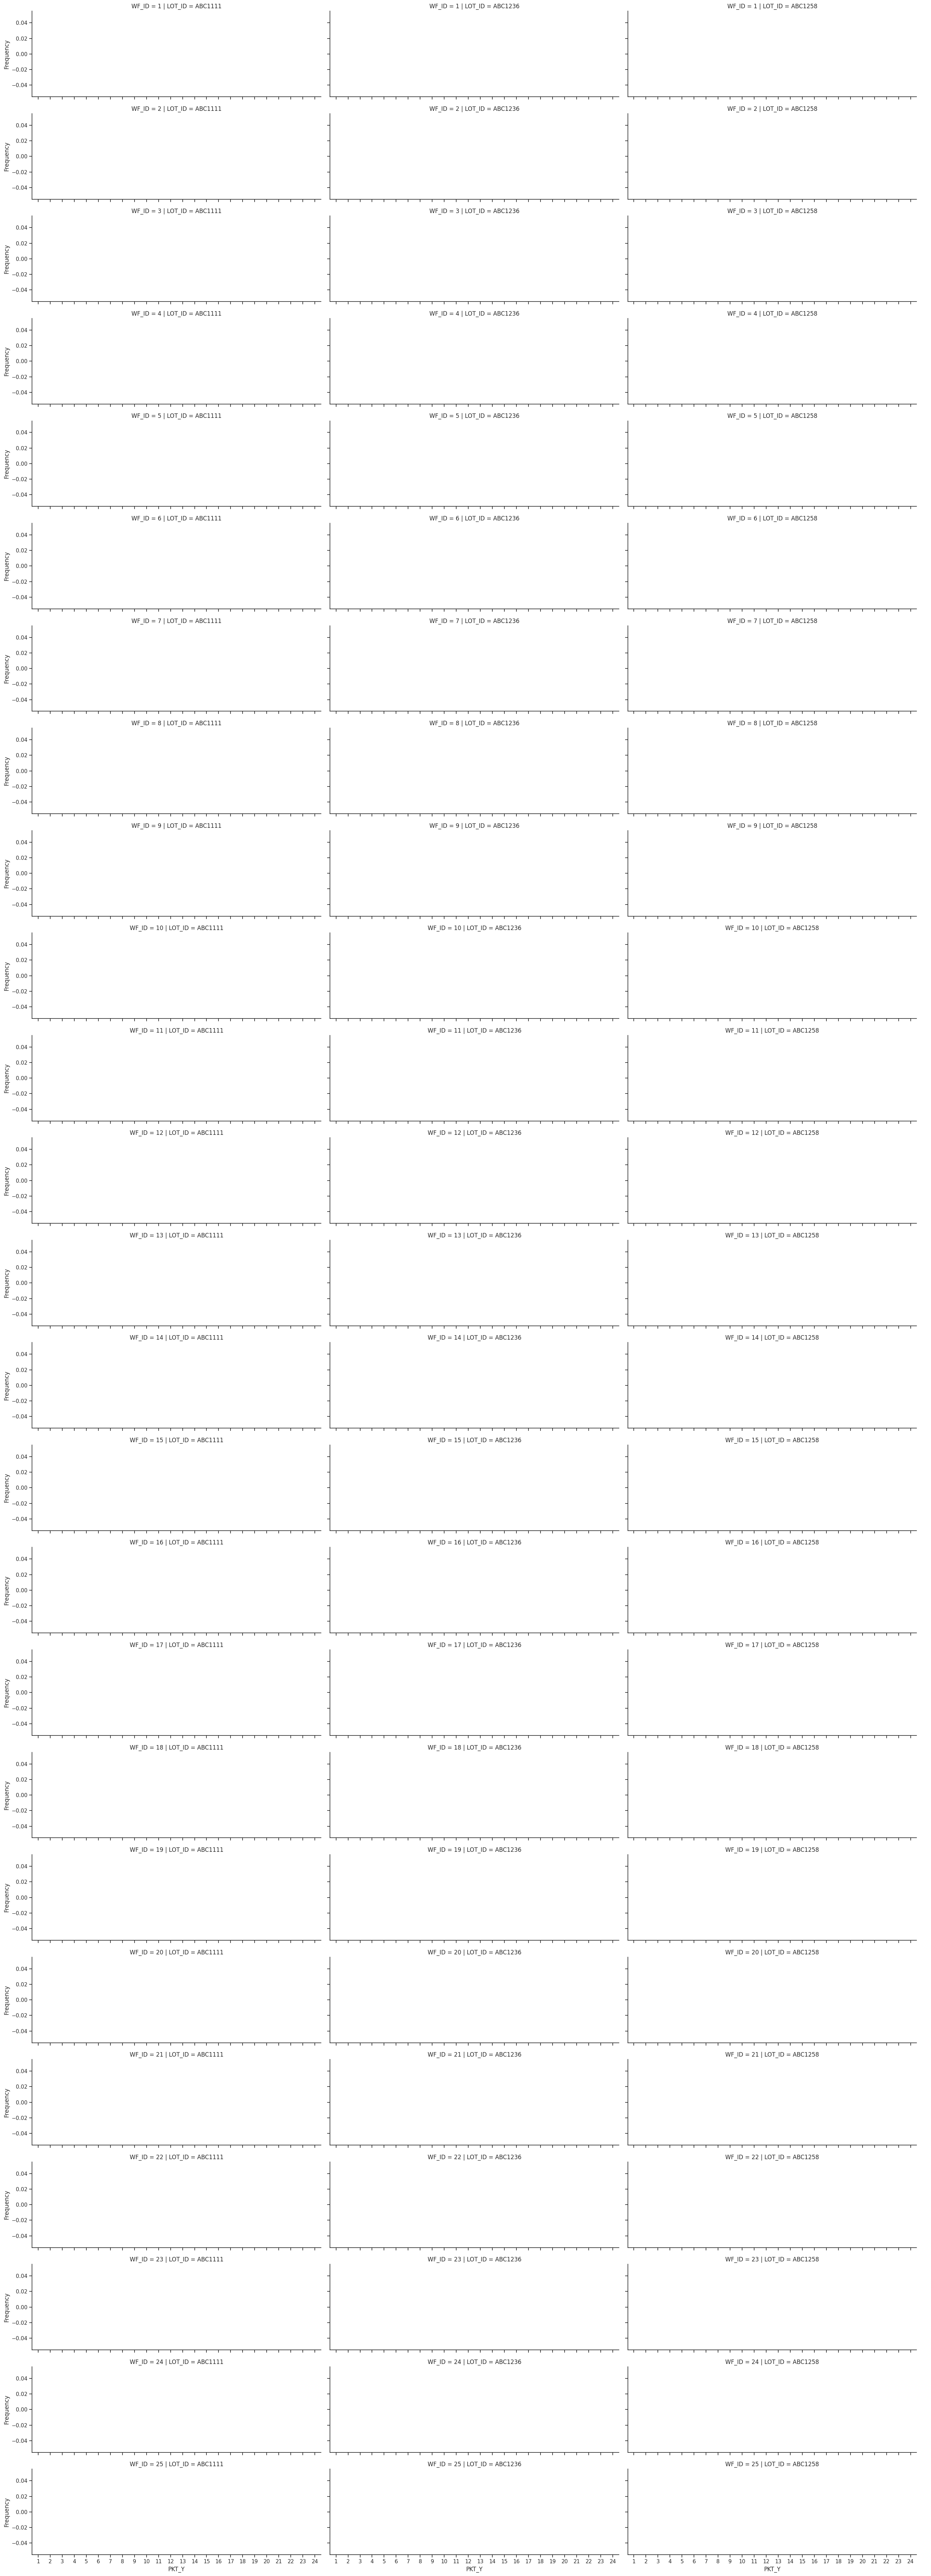

In [31]:
# `LOT_ID`, `WF_ID` 두 가지 범주를 groupby로 구성하여 
# `PKT_Y`에 대한 빈도를 구합니다.
df_bar_lot_wf = df.groupby(['LOT_ID', 'WF_ID', 'PKT_Y']).size().reset_index(name='Frequency')

# catplot을 사용하여 열(column)을 기준으로는 `LOT_ID`, 행(row)를 기준으로 
# WF_ID, x축은 `PKT_Y`, y축은 Frequency인 막대그래프를 그립니다.
sns.catplot(
    x = 'PKT_Y',
    y = 'Frequency',
    order = range(1, 25),
    col = 'LOT_ID',
    row = 'WF_ID',
    kind = 'bar',
    height = 3,
    aspect = 3,
    data = df_bar_lot_wf
)

axes = g.axes.flatten()
for ax in axes:
    ax.set_xticks([0,1], ['Good','Bad'])
plt.show()

변수로 존재하는 `X_AXIS`와 `Y_AXIS`를 활용하여 wafer를 시각적으로 표현할 수 있습니다.  
이때 각 포인트마다 목표변수(`PKT_Y`)를 표현하여 공간적 정보로 차이를 비교할 수 있습니다.

`LOT_ID`와 `WF_ID`에 따른 목표변수(`PKT_Y`)를 막대그래프의 결과를 기반으로 대표적인 특징 세 가지에 해당하는 `LOT_ID`와 `WF_ID`를 지정하여 wafer를 시각화합니다.

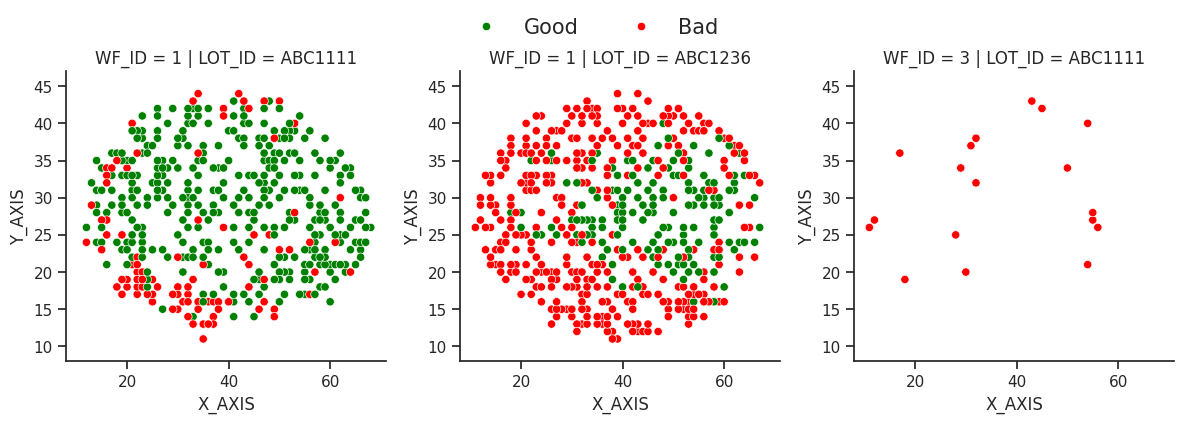

In [32]:
select_ID = [
    ('ABC1111', 1),
    ('ABC1236', 1),
    ('ABC1111', 3),
]

fig, ax = plt.subplots(1, 3, figsize=(12,4))
for i, (lot_id, wf_id) in enumerate(select_ID):
    sns.scatterplot(
        x       = 'X_AXIS',
        y       = 'Y_AXIS',
        palette = {0:'green', 1:'red'},
        hue     = 'PKT_Y',
        data    = df[(df['LOT_ID']==lot_id) & (df['WF_ID']==wf_id)],
        ax      = ax[i]
    )
    ax[i].set_title(f'WF_ID = {wf_id} | LOT_ID = {lot_id}')
    ax[i].set_ylim(df['Y_AXIS'].min()-3, df['Y_AXIS'].max()+3)
    ax[i].set_xlim(df['X_AXIS'].min()-3, df['X_AXIS'].max()+3)    
    
# 모든 축에서 라인과 레이블 수집
lines, labels = ax[0].get_legend_handles_labels()

# 전체 그림에 대한 하나의 범례 생성
fig.legend(lines, ['Good','Bad'], fontsize=15, loc='upper center', ncol=len(labels), bbox_to_anchor=(0.5, 1.08), frameon=False)

# 개별 축의 범례 숨기기
for ax_i in ax.flat:
    ax_i.legend().set_visible(False)
plt.tight_layout()

In [33]:
df.columns

Index(['No.', 'LOT_ID', 'WF_ID', 'X_AXIS', 'Y_AXIS', 'GRADE_CD', 'G_A', 'G_B',
       'G_C', 'G_D', 'G_E', 'G_F', 'G_G', 'G_H', 'G_I', 'G_J', 'G_K', 'G_L',
       'G_M', 'G_N', 'G_O', 'G_P', 'G_Q', 'G_R', 'G_S', 'G_T', 'Neighbor_A',
       'Neighbor_B', 'Neighbor_C', 'Neighbor_D', 'Neighbor_E', 'Neighbor_F',
       'Neighbor_G', 'Neighbor_H', 'Neighbor_I', 'Neighbor_J', 'Neighbor_K',
       'Neighbor_L', 'Neighbor_M', 'Neighbor_N', 'Neighbor_O', 'Neighbor_P',
       'Neighbor_Q', 'Neighbor_R', 'Neighbor_S', 'Neighbor_T', 'Weight_Base_A',
       'Weight_Base_B', 'Weight_Base_C', 'Weight_Base_D', 'Weight_Base_E',
       'Weight_Base_F', 'Weight_Base_G', 'Weight_Base_H', 'Weight_Base_I',
       'Weight_Base_J', 'Weight_Base_K', 'Weight_Base_L', 'Weight_Base_M',
       'Weight_Base_N', 'Weight_Base_O', 'Weight_Base_P', 'Weight_Base_Q',
       'Weight_Base_R', 'Weight_Base_S', 'Weight_Base_T', 'Weight_Bound_A',
       'Weight_Bound_B', 'Weight_Bound_C', 'Weight_Bound_D', 'Weight_Bound_E',
 

앞서 정의한 연속형 변수(공정지표 F data)는 총 80개는 각 변수를 모두 시각화하기에 많은 편에 속합니다.  
따라서 interactive module을 사용해서 jupyter notebook 공간에서 원하는 변수를 선택하여 하나씩 표현하는 것도 좋은 수단이 됩니다.

ipywidgets의 widgets를 사용하여 연속형 변수 리스트를 dropdown으로 구성하고 각 변수를 선택할 때 마다 `LOT_ID`와 `WF_ID`에 따라 violin plot을 사용하여 목표변수(`PKT_Y`)로 나누어 연속형 변수의 분포를 그릴 수 있습니다.

In [36]:
# 드롭다운 메뉴 생성
dropdown = widgets.Dropdown(
    options=continuous_features,
    value=continuous_features[0],
    description='Variable:',
)

def update_plot(variable):
    g = sns.catplot(
        x       = 'WF_ID',
        y       = variable,
        row     = 'LOT_ID',
        hue     = 'PKT_Y',
        split   = True,
        kind    = 'violin',
        inner   = 'quart',
        palette = ['green', 'red'],
        cut     = 0,
        width   = 5,
        aspect  = 2,
        data    = df
    )
    new_labels = ['Good', 'Bad']
    for t, l in zip(g._legend.texts, new_labels):
        t.set_text(l)
    plt.show()

# 인터랙티브 위젯 생성
interact(update_plot, variable=dropdown)

interactive(children=(Dropdown(description='Variable:', options=('G_A', 'G_B', 'G_C', 'G_D', 'G_E', 'G_F', 'G_…

<function __main__.update_plot(variable)>

## 3. 데이터 전처리
---

1. 범주형 변수를 one-hot encoding으로 변환합니다.
2. 모델 학습을 위해 데이터를 학습데이터와 검증데이터로 구분합니다.

## 3.1 One-hot Encoding

범주형 변수를 one-hot encoding 하기 위해서는 pandas의 `get_dummies` function을 적용하면 됩니다.  
이때 prefix로 범주형 변수명을 입력하면 새로 생성된 one-hot encoding의 변수명을 `기존 범주형 변수_범주명`으로 지정할 수 있습니다.

In [37]:
pd.get_dummies(df['LOT_ID'], prefix='LOT_ID')

,LOT_ID_ABC1111,LOT_ID_ABC1236,LOT_ID_ABC1258
0,False,False,True
1,False,False,True
2,False,False,True
3,False,True,False
4,False,False,True
...,...,...,...
44886,False,False,True
44887,False,True,False
44888,False,False,True
44889,True,False,False


one-hot encoding으로 범주형 변수를 변환한 후 기존 dataframe에 추가합니다.

In [38]:
categorical_features = ['LOT_ID', 'WF_ID', 'GRADE_CD']
df_onehot = df.copy() # one-hot encoding 결과를 새로운 dataframe에 추가하기 위해 기존 df를 copy method로 복제

for cat in categorical_features:
    df_onehot = pd.concat([
        df_onehot, pd.get_dummies(df[cat], prefix=cat)
    ], axis=1)

In [39]:
df_onehot.columns

Index(['No.', 'LOT_ID', 'WF_ID', 'X_AXIS', 'Y_AXIS', 'GRADE_CD', 'G_A', 'G_B',
       'G_C', 'G_D',
       ...
       'WF_ID_20', 'WF_ID_21', 'WF_ID_22', 'WF_ID_23', 'WF_ID_24', 'WF_ID_25',
       'GRADE_CD_N1', 'GRADE_CD_NQ', 'GRADE_CD_OQ1', 'GRADE_CD_SQ'],
      dtype='object', length=120)

In [40]:
print('변수 수 변화')
print('one-hot encoding 추가 전: ', df.shape)
print('one-hot encoding 추가 후: ', df_onehot.shape)

변수 수 변화
one-hot encoding 추가 전:  (44891, 88)
one-hot encoding 추가 후:  (44891, 120)


## 3.2 학습 데이터와 검증 데이터로 구분

`Train/Test` 변수가 존재하기 때문에 어떤 범주가 어느정도 빈도로 있는지 확인합니다.

In [41]:
df_onehot['Train/Test'].value_counts()

Train/Test
Train    44891
Name: count, dtype: int64

앞서 살펴본 바와 같이 목표변수(`PKT_Y`)가 불균형한 형태입니다.  
또한, `LOT_ID`와 `WF_ID`가 함께 고유 ID로 존재합니다.  

이러한 경우 데이터를 무작위로 학습 데이터와 검증 데이터로 나누게 되면 두 데이터에 `LOT_ID`, `WF_ID`, `PKT_Y` 정보가 서로 다른게 존재하게되고, 이는 모델 학습에 안좋은 편향을 줄 수 있게 됩니다.<br>
따라서, 세 가지 범주를 고려하여 전략적으로 데이터를 나누는 것이 필요합니다.

데이터를 나눌때는 scikit-learn(`sklearn`)에 있는 train_test_split function을 사용하여 데이터를 구분합니다. 
- test_size:
    - float 형태로 입력하는 경우 0~1 사이 값을 주어야하며 이는 전체 데이터 중 평가 데이터로 구성할 비율을 의미합니다.
    - int 형태로 입력하는 경우 1 이상의 값을 주어야하며 이는 전체 데이터 중 평가 데이터로 구성항 데이터 크기를 의미합니다.
- stratify:
    - 데이터를 나눌때 동일한 비율로 나누고자 하는 기준이되는 값을 의미합니다. 이때 기준이 되는 값에 속하는 특정 범주가 한개만 존재하는 경우 에러가 발생합니다.
- random_state:
    - train_test_split function을 사용할 때는 무작위성이 포함됩니다. 따라서 다시 실행했을 때 동일한 결과를 얻기 위해서는 random_state에 seed를 고정하여 사용합니다. 이때 int 형태로 seed를 지정합니다.


In [42]:
stratify_y = df_onehot[['LOT_ID', 'WF_ID', 'PKT_Y']].apply(lambda x: f'{x.LOT_ID}_{x.WF_ID}_{x.PKT_Y}', axis=1)

df_train, df_val = train_test_split(df_onehot, test_size=0.3, stratify=stratify_y, random_state=223)

In [43]:
print('df_train.shape: ',df_train.shape)
print('df_val.shape: ',df_val.shape)

df_train.shape:  (31423, 120)
df_val.shape:  (13468, 120)


학습 데이터와 검증 데이터로 나누었다면 stratify를 사용하여 지정한대로 두 데이터에 비율이 동일한지 확인합니다.

In [44]:
pd.merge(
    df_train['LOT_ID'].value_counts(normalize=True).reset_index(name="Train Ratio"),
    df_val['LOT_ID'].value_counts(normalize=True).reset_index(name="Test Ratio"),
    on = 'LOT_ID',
    how = 'inner'
)

,LOT_ID,Train Ratio,Test Ratio
0,ABC1258,0.524775,0.524874
1,ABC1236,0.265283,0.264999
2,ABC1111,0.209942,0.210128


In [45]:
pd.merge(
    df_train.groupby('LOT_ID')['WF_ID'].value_counts(normalize=True).reset_index(name='Train Ratio'),
    df_val.groupby('LOT_ID')['WF_ID'].value_counts(normalize=True).reset_index(name='Test Ratio'),
    on = ['LOT_ID', 'WF_ID'],
    how = 'inner'
).sort_values(['LOT_ID', 'WF_ID'])

,LOT_ID,WF_ID,Train Ratio,Test Ratio
17,ABC1111,1,0.046385,0.046290
20,ABC1111,3,0.001971,0.001767
9,ABC1111,4,0.052903,0.052650
5,ABC1111,6,0.055025,0.054770
18,ABC1111,7,0.002425,0.002473
11,ABC1111,8,0.052145,0.052297
16,ABC1111,9,0.047597,0.047350
22,ABC1111,10,0.000910,0.001060
19,ABC1111,11,0.002122,0.002120
2,ABC1111,12,0.056541,0.056890


In [46]:
pd.merge(
    df_train.groupby(['LOT_ID', 'WF_ID'])['PKT_Y'].value_counts(normalize=True).reset_index(name='Train Ratio'),
    df_val.groupby(['LOT_ID', 'WF_ID'])['PKT_Y'].value_counts(normalize=True).reset_index(name='Test Ratio'),
    on = ['LOT_ID', 'WF_ID', 'PKT_Y'],
    how = 'inner'
).sort_values(['LOT_ID', 'WF_ID'])

,LOT_ID,WF_ID,PKT_Y,Train Ratio,Test Ratio
0,ABC1111,1,0.0,0.784314,0.786260
1,ABC1111,1,1.0,0.215686,0.213740
2,ABC1111,3,1.0,1.000000,1.000000
3,ABC1111,4,0.0,0.902579,0.906040
4,ABC1111,4,1.0,0.097421,0.093960
5,ABC1111,6,0.0,0.848485,0.851613
6,ABC1111,6,1.0,0.151515,0.148387
7,ABC1111,7,1.0,1.000000,1.000000
8,ABC1111,8,0.0,0.944767,0.945946
9,ABC1111,8,1.0,0.055233,0.054054


학습 데이터와 검증 데이터를 pandas의 `to_csv` method로 저장합니다.

In [47]:
df_train.to_csv('train.csv', index=False)
df_val.to_csv('validation.csv', index=False)

---